In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [5]:
# read in transactions.csv 
transactions = pd.read_csv("C:\\Users\\User\\PANDAS\Pandas Course Resources\\Pandas Course Resources\\retail\\transactions.csv", parse_dates=["date"])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
transactions["date"]=pd.to_datetime(transactions)

In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [12]:
max_date = transactions["date"].max()

In [13]:
min_date =transactions["date"].min()

In [16]:
diff = max_date-min_date
diff

Timedelta('1687 days 00:00:00')

In [17]:
transactions["time_to_last_date"] = transactions["date"].max()-transactions["date"]

In [18]:
transactions.head()

,date,store_nbr,transactions,time_to_last_date
0,2013-01-01,25,770,1687 days
1,2013-01-02,1,2111,1686 days
2,2013-01-02,2,2358,1686 days
3,2013-01-02,3,3487,1686 days
4,2013-01-02,4,1922,1686 days


In [20]:
#Next, create columns for the date parts year, month, and weekday.
transactions["year"] = transactions["date"].dt.year
transactions["month"] = transactions["date"].dt.month
transactions["weekday"] = transactions["date"].dt.weekday
transactions

,date,store_nbr,transactions,time_to_last_date,year,month,weekday
0,2013-01-01,25,770,1687 days,2013,1,1
1,2013-01-02,1,2111,1686 days,2013,1,2
2,2013-01-02,2,2358,1686 days,2013,1,2
3,2013-01-02,3,3487,1686 days,2013,1,2
4,2013-01-02,4,1922,1686 days,2013,1,2
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,0 days,2017,8,1
83484,2017-08-15,51,1573,0 days,2017,8,1
83485,2017-08-15,52,2255,0 days,2017,8,1
83486,2017-08-15,53,932,0 days,2017,8,1


In [22]:
#* Finally, format the date to Year-Month-Day (This will be a string/object).
transactions["date"]=transactions["date"].dt.strftime("%Y-%B-%d")

In [23]:
transactions.head(10)

,date,store_nbr,transactions,time_to_last_date,year,month,weekday
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2
5,2013-January-02,5,1903,1686 days,2013,1,2
6,2013-January-02,6,2143,1686 days,2013,1,2
7,2013-January-02,7,1874,1686 days,2013,1,2
8,2013-January-02,8,3250,1686 days,2013,1,2
9,2013-January-02,9,2940,1686 days,2013,1,2


In [25]:
transactions.info()
#to show that the date is again converted into an object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   date               83488 non-null  object         
 1   store_nbr          83488 non-null  int64          
 2   transactions       83488 non-null  int64          
 3   time_to_last_date  83488 non-null  timedelta64[ns]
 4   year               83488 non-null  int32          
 5   month              83488 non-null  int32          
 6   weekday            83488 non-null  int32          
dtypes: int32(3), int64(2), object(1), timedelta64[ns](1)
memory usage: 3.5+ MB


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [26]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("C:\\Users\\User\\PANDAS\Pandas Course Resources\\Pandas Course Resources\\retail\\transactions.csv", parse_dates=["date"])

In [27]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [28]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [31]:
# Can you add three weeks to the ‘time_to_last_date’ column? #Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

transactions.assign(
    time_to_last_date=pd.to_timedelta((3*7), unit="D") + transactions["time_to_last_date"], 
    weeks_to_last_date=(lambda x: x["time_to_last_date"].dt.days/7)
).head()


,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143


In [47]:
transactions.set_index("date").loc["2013-01-01":"2013-01-05"] #testing date filtering when we set the date as an index

,store_nbr,transactions,year,month,day_of_week,time_to_last_date
date,,,,,,
2013-01-01,25,770,2013,1,1,1687 days
2013-01-02,1,2111,2013,1,2,1686 days
2013-01-02,2,2358,2013,1,2,1686 days
2013-01-02,3,3487,2013,1,2,1686 days
2013-01-02,4,1922,2013,1,2,1686 days
...,...,...,...,...,...,...
2013-01-05,48,4084,2013,1,5,1683 days
2013-01-05,49,2562,2013,1,5,1683 days
2013-01-05,50,3459,2013,1,5,1683 days


In [49]:
transactions.describe()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
count,83488,83488.000000,83488.000000,83488.000000,83488.000000,83488.000000,83488
mean,2015-05-20 16:07:40.866232064,26.939237,1694.602158,2014.907041,6.240801,2.995892,817 days 07:52:19.133767720
min,2013-01-01 00:00:00,1.000000,5.000000,2013.000000,1.000000,0.000000,0 days 00:00:00
25%,2014-03-27 00:00:00,13.000000,1046.000000,2014.000000,3.000000,1.000000,396 days 18:00:00
50%,2015-06-08 00:00:00,27.000000,1393.000000,2015.000000,6.000000,3.000000,799 days 00:00:00
75%,2016-07-14 06:00:00,40.000000,2079.000000,2016.000000,9.000000,5.000000,1237 days 00:00:00
max,2017-08-15 00:00:00,54.000000,8359.000000,2017.000000,12.000000,6.000000,1687 days 00:00:00
std,NaN,15.608204,963.286644,1.346804,3.374489,2.000143,487 days 01:02:04.381639120


# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [50]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("C:\\Users\\User\\PANDAS\Pandas Course Resources\\Pandas Course Resources\\retail\\oil.csv", 
                  index_col="date", 
                  parse_dates=True)
oil

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [51]:
# This is a synonym for datetime64
oil.index.dtype

dtype('<M8[ns]')

In [53]:
# mean of original series

oil.mean()
oil.bfill().mean()

dcoilwtico    67.673325
dtype: float64

<Axes: xlabel='date'>

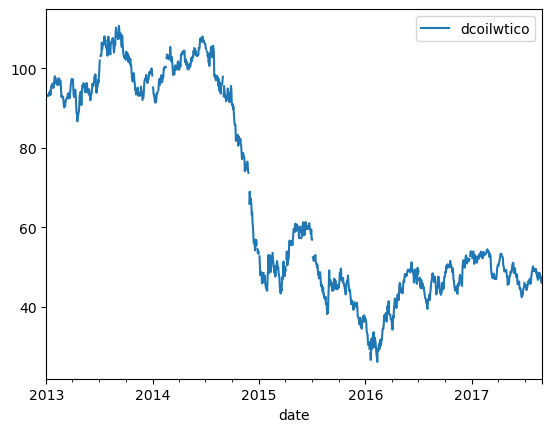

In [54]:
# original plot

oil.plot()

<Axes: xlabel='date'>

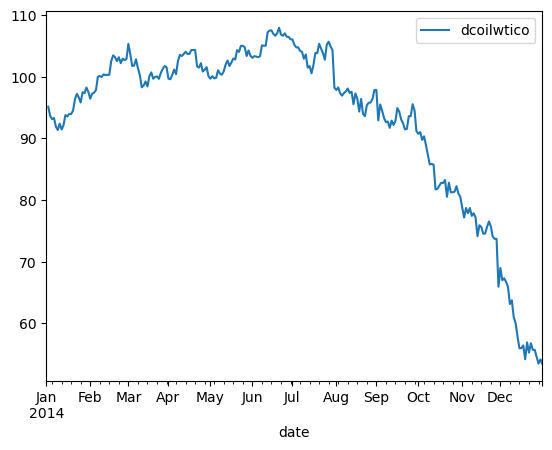

In [55]:
oil.loc["2014"].ffill().plot()

<Axes: xlabel='date'>

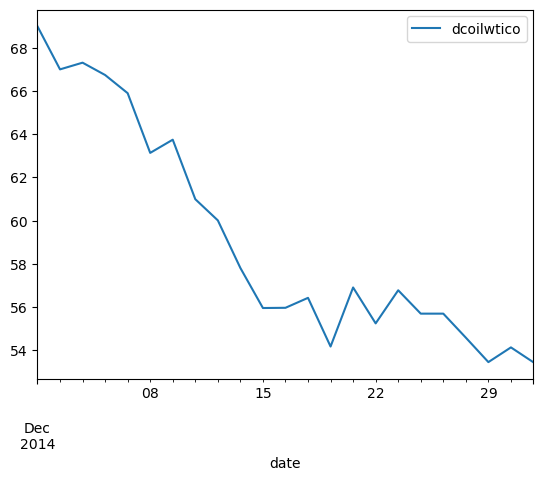

In [56]:
oil.loc["2014-12"].ffill().plot()

<Axes: xlabel='date'>

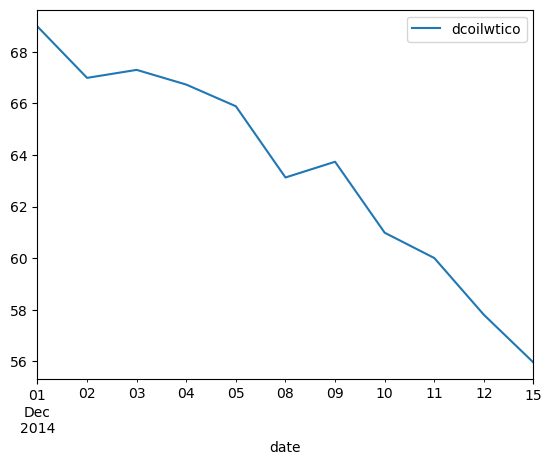

In [57]:
oil.loc["2014-12-01":"2014-12-15"].ffill().plot()

# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [83]:
transactions["date"]=pd.to_datetime(transactions["date"])

# filter df to store 47, 'drop' store_nbr column via loc
transactions_47 = transactions.parse_dates["".loc[transactions["store_nbr"] == 47, ["date", "transactions"]]

# Calculate sum of sales by year and month
transactions_47 = (transactions_47
                   .groupby([transactions["date"].dt.year, transactions["date"].dt.month])
                   .sum())

# Calculate a 'year_prior' column by shiftly monthly sales series forward by 12 rows (months)
transactions_47["year_prior"] = transactions_47["transactions"].shift(12)

# Filter to 2015 and plot
transactions_47.loc[2015].plot();

SyntaxError: '[' was never closed (335295648.py, line 4)

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [84]:
oil.head()


,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [92]:
oil.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 51.3 KB


<Axes: xlabel='date'>

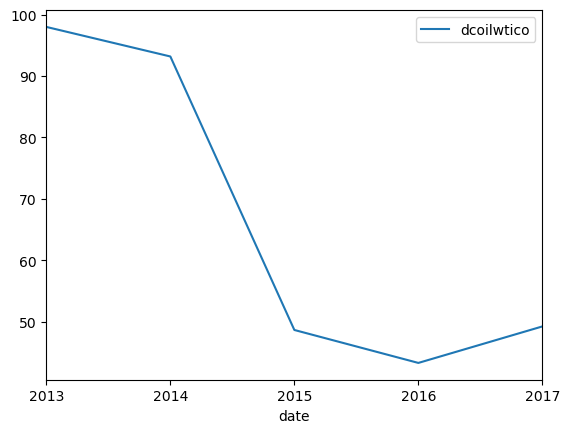

In [87]:
oil.resample("Y").mean().plot()

<Axes: xlabel='date'>

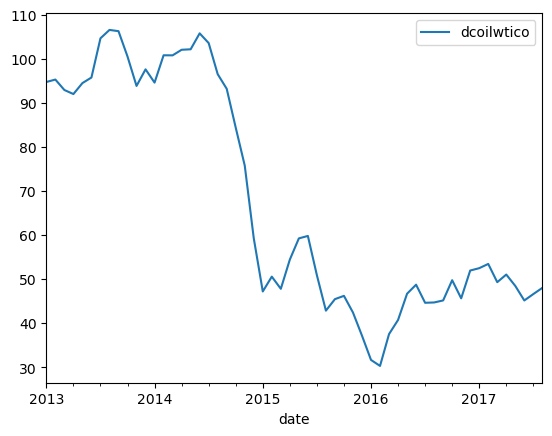

In [88]:
oil.resample("M").mean().plot()

<Axes: xlabel='date'>

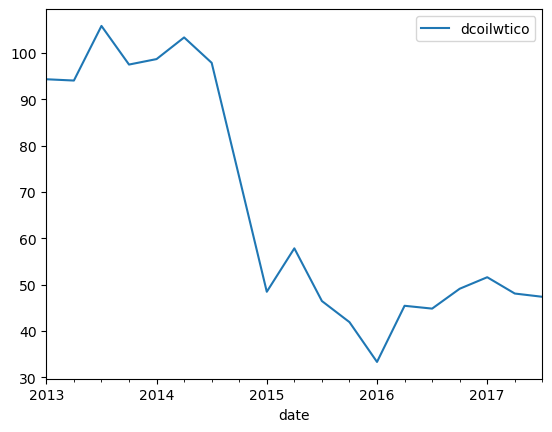

In [91]:
#quarterly for test
oil.resample("Q").mean().plot()

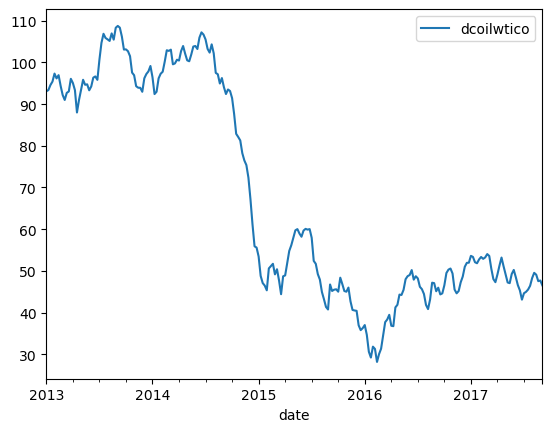

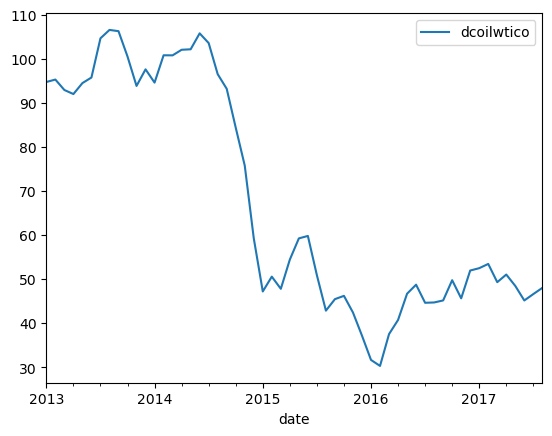

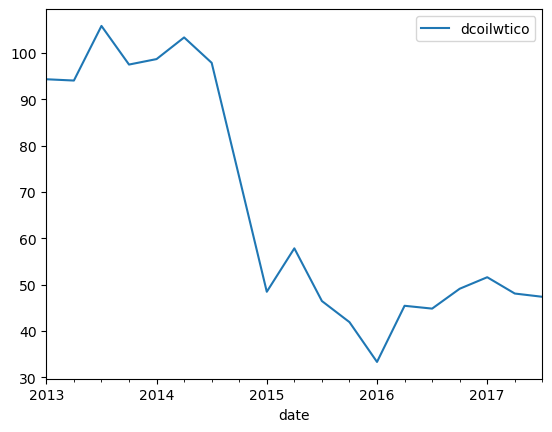

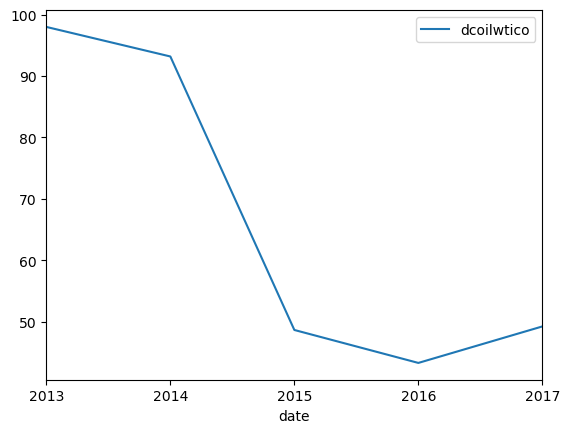

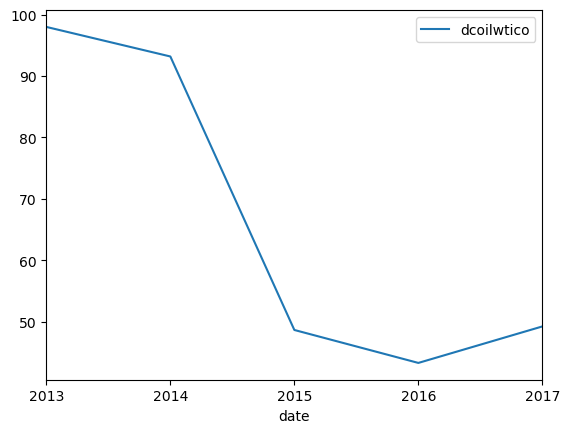

In [95]:
for period in ["W", "M", "Q", "A", "Y"]:
               oil.resample(period).mean().plot();


# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [97]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<Axes: xlabel='date'>

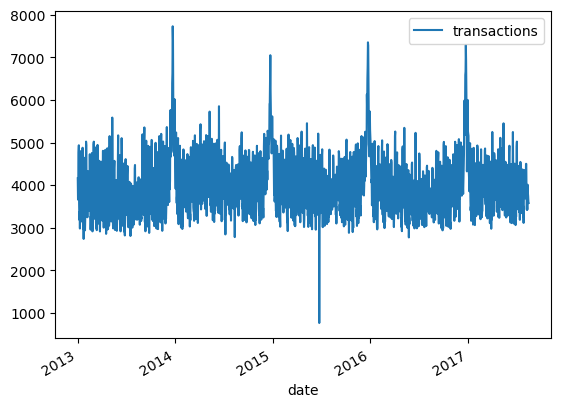

In [98]:
# original daily series for comparison

transactions_47.plot()

<Axes: xlabel='date'>

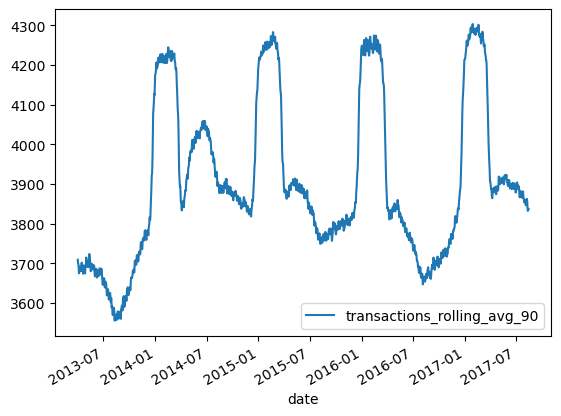

In [101]:
(transactions_47
.assign(transactions_rolling_avg_90=transactions_47.rolling(90).mean())
 .drop(["transactions"], axis=1)
 .plot()
)